<a href="https://colab.research.google.com/github/YuvanShankar2006/free_code_camp_projects/blob/main/cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import requests
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Download the dataset
url = 'https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip'
filename = 'cats_and_dogs.zip'
r = requests.get(url, allow_redirects=True)
open(filename, 'wb').write(r.content)

# Extract the dataset
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')

# Define data generators
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Update directory path to the extracted dataset
dataset_dir = 'cats_and_dogs'

# Generate data
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=dataset_dir,  # Updated directory path
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    shuffle=False
)

validation_data_gen = validation_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=dataset_dir,  # Updated directory path
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=dataset_dir,  # Updated directory path
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary',
    shuffle=False)
# ... rest of your code ...

Found 3050 images belonging to 3 classes.
Found 3050 images belonging to 3 classes.
Found 3050 images belonging to 3 classes.


In [3]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,      # Rotate images up to 40 degrees
    width_shift_range=0.2,  # Shift width by 20%
    height_shift_range=0.2, # Shift height by 20%
    shear_range=0.2,        # Shear the image
    zoom_range=0.2,         # Zoom in or out by 20%
    horizontal_flip=True,   # Flip the image horizontally
    fill_mode='nearest'     # Fill in missing pixels with nearest values
)


In [4]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
EPOCHS = 4
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_data_gen,
    validation_steps=validation_data_gen.samples // BATCH_SIZE
)


Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.6599 - loss: -2532203.7500 - val_accuracy: 0.6556 - val_loss: -160777488.0000
Epoch 2/4
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.7000 - val_loss: -186117760.0000
Epoch 3/4


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


95/95 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.6596 - loss: -3148109568.0000 - val_accuracy: 0.6553 - val_loss: -52629004288.0000
Epoch 4/4
95/95 ━━━━━━━━━━━━━━━━━━━━ 33s 320ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.8000 - val_loss: -31730798592.0000


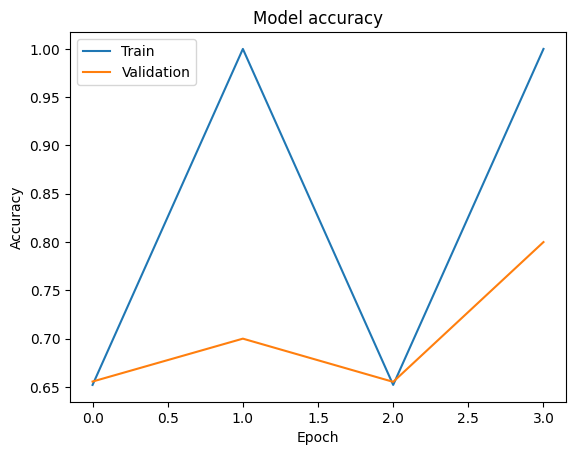

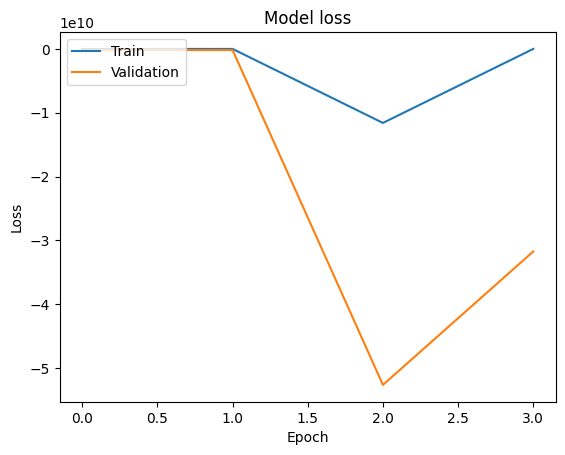

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [7]:
import numpy as np

# Predict class probabilities on the test set
probabilities = model.predict(test_data_gen)

# Convert probabilities into binary predictions (0 or 1)
predictions = [1 if prob > 0.5 else 0 for prob in probabilities]

# Plot test images with their predictions
plotImages(test_data_gen, predictions)


96/96 ━━━━━━━━━━━━━━━━━━━━ 50s 522ms/step


NameError: name 'plotImages' is not defined

96/96 ━━━━━━━━━━━━━━━━━━━━ 52s 537ms/step


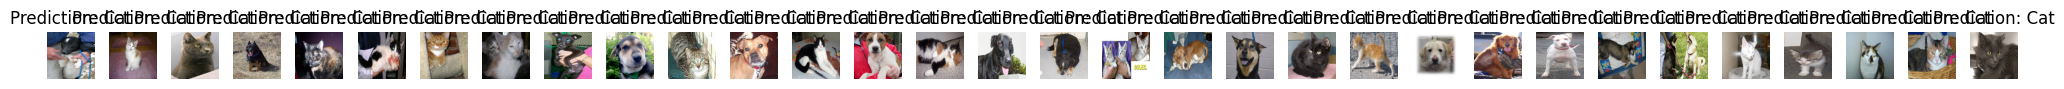

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plotImages(image_generator, predictions):
    """
    Plots images from the image generator with their corresponding predictions.

    Args:
        image_generator: The image generator.
        predictions: A list of predictions for the images.
    """

    # Get a batch of images and labels from the generator
    images, labels = next(image_generator)

    # Number of images to display
    num_images = len(images)

    # Create a figure and axes for plotting
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))

    # Iterate through the images and plot them with predictions
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].axis('off')  # Turn off axis labels
        axes[i].set_title(f"Prediction: {'Cat' if predictions[i] == 1 else 'Dog'}")  # Assuming binary classification

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Predict class probabilities on the test set
probabilities = model.predict(test_data_gen)

# Convert probabilities into binary predictions (0 or 1)
predictions = [1 if prob > 0.5 else 0 for prob in probabilities]

# Plot test images with their predictions
plotImages(test_data_gen, predictions)

96/96 ━━━━━━━━━━━━━━━━━━━━ 57s 599ms/step
Accuracy: 0.66


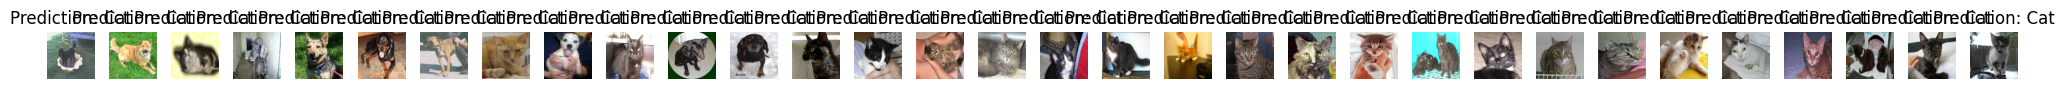

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score #Import to calculate accuracy

def plotImages(image_generator, predictions):
    """
    Plots images from the image generator with their corresponding predictions.

    Args:
        image_generator: The image generator.
        predictions: A list of predictions for the images.
    """

    # Get a batch of images and labels from the generator
    images, labels = next(image_generator)

    # Number of images to display
    num_images = len(images)

    # Create a figure and axes for plotting
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))

    # Iterate through the images and plot them with predictions
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].axis('off')  # Turn off axis labels
        axes[i].set_title(f"Prediction: {'Cat' if predictions[i] == 1 else 'Dog'}")  # Assuming binary classification

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Predict class probabilities on the test set
probabilities = model.predict(test_data_gen)

# Convert probabilities into binary predictions (0 or 1)
predictions = [1 if prob > 0.5 else 0 for prob in probabilities]

# Get true labels from the test data generator
true_labels = test_data_gen.classes

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy:.2f}") # Print accuracy with 2 decimal places

# Plot test images with their predictions
plotImages(test_data_gen, predictions)